In [51]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqUtils import nt_search as nt
from Bio.SeqUtils import MeltingTemp as mt
from Bio.SeqUtils import molecular_weight as mw
from collections import Counter
from matplotlib import pyplot as plt
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Levenshtein import distance

In [52]:
# Read fasta
content_seqA = SeqIO.read('./D16S318.fasta', 'fasta')
content_seqB = SeqIO.read('./MG821630.fasta', 'fasta')

seqA = content_seqA.seq
seqB = content_seqB.seq

In [53]:
# 1
# a. Find and display total length of seqA and seqB
print(seqA)
print(seqB)
print(len(seqA))
print(len(seqB))

CTGTGGTGTCACATCAGGAAGTACATAATGATTTGGTGAGGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTATGTGGTGTTTATGTATAAGATTGGTCAATGGGTTCAGTCCAATCGGTTCATGTGTAGTC
ACTTGCTTTGGCGGTGGGCCCAGCCTGCCGCCAGAGGTCTAAACTTACAACCAATTTTTTATCAACTTGTCACACCAGATTATTACTAATAGTCCAAACTTTCAACAACGGATCTCTTGGTTCTCGCATCGATGAAGAACGCAGCGAAATGCGATACGTAATATGAATTGCAGATATTCGTGAATCATCGAATCTTTGAACGCACATTGCGCCCTCTGGTATTCCGGAGGGCATGCCTGTTTGAGCGTCGTTTCTCCCTCAAACCGCTGGGTTTGGTGTTGAGCAATACGACTTGGGTTTGCTTGAAAGACGGGAGTGGTAAGGCGGGATCGCTTTGGCAATGGCTTAGGGCCAACCGAAAACATTGCTTGCCGCGGTAACGTCTACCACGTATATCTTCAAACTTTGACCTCGAATCATGTAGGACTACCCGCTGGACTTTACCGCATG
144
450


In [54]:
# B. Find and display which index time the codon (GTG) appears in SeqA and SeqB
print(seqA.find('GTG'))
print(seqB.find('GTG'))


find = Seq('GTG')
print(nt(str(seqA), find))
print(nt(str(seqB), find))

2
13
['GTG', 2, 5, 35, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 86, 89, 136]
['GTG', 13, 179, 275, 315]


In [55]:
seqC = seqA[:10] + seqB[-5:]
seqC = seqC[::-1]
seqC

Seq('GTACGCTGTGGTGTC')

In [56]:
# 2
# a
print(mt.Tm_Wallace(seqA))
print(mt.Tm_Wallace(seqB))
print(mt.Tm_Wallace(seqC))

print(mt.Tm_NN(seqA))
print(mt.Tm_NN(seqB))
print(mt.Tm_NN(seqC))

414.0
1332.0
48.0
75.7899981286252
81.2511079164305
45.36696437579121


In [57]:
# b
def gc_content(seq):
    result = float(seq.count('G') + seq.count('C'))/len(seq)
    return result * 100

def at_content(seq):
    result = float(seq.count('A') + seq.count('T'))/len(seq)
    return result * 100

print(gc_content(seqA))
print(gc_content(seqB))
print(gc_content(seqC))

print(at_content(seqA))
print(at_content(seqB))
print(at_content(seqC))

43.75
48.0
60.0
56.25
52.0
40.0


In [58]:
# c molecular weight
print(mw(seqA))
print(mw(seqB))
print(mw(seqC))

45133.6662
138936.53459999975
4694.9686


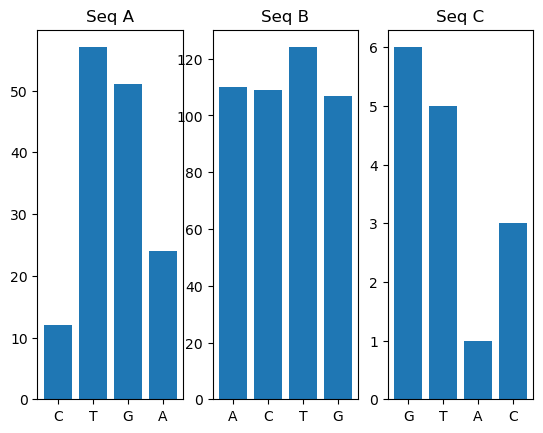

In [59]:
# d determine and display the nucleotides base
base_seqA = Counter(seqA)
base_seqB = Counter(seqB)
base_seqC = Counter(seqC)

plt.subplot(1, 3, 1)
plt.title('Seq A')
plt.bar(base_seqA.keys(), base_seqA.values())
plt.subplot(1, 3, 2)
plt.title('Seq B')
plt.bar(base_seqB.keys(), base_seqB.values())
plt.subplot(1, 3, 3)
plt.title('Seq C')
plt.bar(base_seqC.keys(), base_seqC.values())
plt.show()

In [60]:
# 3
mRNA_seqA = seqA.transcribe()
mRNA_seqB = seqB.transcribe()
mRNA_seqC = seqC.transcribe()

print(mRNA_seqA)
print(mRNA_seqB)
print(mRNA_seqC)

CUGUGGUGUCACAUCAGGAAGUACAUAAUGAUUUGGUGAGGUGUGUGUGUGUGUGUGUGUGUGUGUGUGUGUGUGUGUGUGUGUAUGUGGUGUUUAUGUAUAAGAUUGGUCAAUGGGUUCAGUCCAAUCGGUUCAUGUGUAGUC
ACUUGCUUUGGCGGUGGGCCCAGCCUGCCGCCAGAGGUCUAAACUUACAACCAAUUUUUUAUCAACUUGUCACACCAGAUUAUUACUAAUAGUCCAAACUUUCAACAACGGAUCUCUUGGUUCUCGCAUCGAUGAAGAACGCAGCGAAAUGCGAUACGUAAUAUGAAUUGCAGAUAUUCGUGAAUCAUCGAAUCUUUGAACGCACAUUGCGCCCUCUGGUAUUCCGGAGGGCAUGCCUGUUUGAGCGUCGUUUCUCCCUCAAACCGCUGGGUUUGGUGUUGAGCAAUACGACUUGGGUUUGCUUGAAAGACGGGAGUGGUAAGGCGGGAUCGCUUUGGCAAUGGCUUAGGGCCAACCGAAAACAUUGCUUGCCGCGGUAACGUCUACCACGUAUAUCUUCAAACUUUGACCUCGAAUCAUGUAGGACUACCCGCUGGACUUUACCGCAUG
GUACGCUGUGGUGUC


In [61]:
# b
aminoAcidSeqA = mRNA_seqA.translate()
aminoAcidSeqB = mRNA_seqB.translate()
aminoAcidSeqC = mRNA_seqC.translate()

print(aminoAcidSeqA)
print(aminoAcidSeqB)
print(aminoAcidSeqC)

LWCHIRKYIMIW*GVCVCVCVCVCVCVCMWCLCIRLVNGFSPIGSCVV
TCFGGGPSLPPEV*TYNQFFINLSHQIITNSPNFQQRISWFSHR*RTQRNAIRNMNCRYS*IIESLNAHCALWYSGGHACLSVVSPSNRWVWC*AIRLGFA*KTGVVRRDRFGNGLGPTENIACRGNVYHVYLQTLTSNHVGLPAGLYRM
VRCGV


In [62]:
seqCompare = Seq('CGCIACTAGC.AIGCGC.AT')
local = pairwise2.align.localxx(seqA, seqCompare, one_alignment_only=True, score_only=True)

print(local)

16.0


In [63]:
seqCompare = Seq('TAGCAGCTACGIGTG.AC')
local = pairwise2.align.localxx(seqB, seqCompare, one_alignment_only=True)

print(format_alignment(*local[0]))
print(local)

385 TACCACGTATATCTTCAAACTTTGACCTCGAATCATGTAGGACTACCC-GCTGGACTTT-ACCGC
    |   | |        |  |    |  ||   | |      |        | | |      |   |
  1 T---A-G--------C--A----G--CT---A-C------G-------IG-T-G-----.A---C
  Score=16

[Alignment(seqA='ACTTGCTTTGGCGGTGGGCCCAGCCTGCCGCCAGAGGTCTAAACTTACAACCAATTTTTTATCAACTTGTCACACCAGATTATTACTAATAGTCCAAACTTTCAACAACGGATCTCTTGGTTCTCGCATCGATGAAGAACGCAGCGAAATGCGATACGTAATATGAATTGCAGATATTCGTGAATCATCGAATCTTTGAACGCACATTGCGCCCTCTGGTATTCCGGAGGGCATGCCTGTTTGAGCGTCGTTTCTCCCTCAAACCGCTGGGTTTGGTGTTGAGCAATACGACTTGGGTTTGCTTGAAAGACGGGAGTGGTAAGGCGGGATCGCTTTGGCAATGGCTTAGGGCCAACCGAAAACATTGCTTGCCGCGGTAACGTCTACCACGTATATCTTCAAACTTTGACCTCGAATCATGTAGGACTACCC-GCTGGACTTT-ACCGCATG', seqB='------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [64]:

print(distance(seqA, seqB))

314
